# Ultimate Data Science Challenge

## Part 1 - EDA

Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
df = pd.io.json.read_json('../ultimate_challenge/logins.json')
df

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


Adding Logins feature

In [3]:
df.count()

login_time    93142
dtype: int64

In [4]:
df['logins'] = 1
df.head()

,login_time,logins
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


Setting login_time as the index. Sorting the index.

In [5]:
df.login_time = pd.to_datetime(df['login_time'])
df.set_index('login_time', inplace=True)
df = df.sort_index()
df

,logins
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1
...,...
1970-04-13 18:48:52,1
1970-04-13 18:50:19,1
1970-04-13 18:54:02,1


Resampling on 15 minutes

In [6]:
df = df.resample('15min').sum()

In [7]:
df

,logins
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


Let's plot our data for intial exploration

<AxesSubplot:xlabel='login_time'>

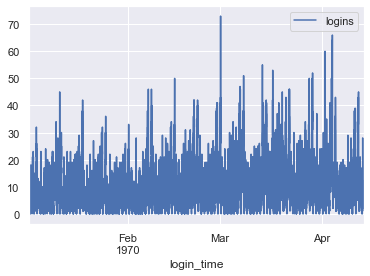

In [8]:
df.plot()

We can see that we have some peaks but it's had to see when those are happening.

Let's use resampling by day over a rolling window to see how the trend in our daily logins.

<AxesSubplot:xlabel='login_time'>

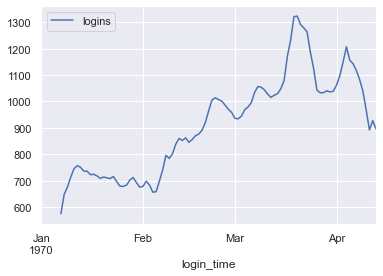

In [9]:
df.resample('D').sum().rolling(window=7).mean().plot()

we can see a substantial increase in March.

Let's plot the data for January

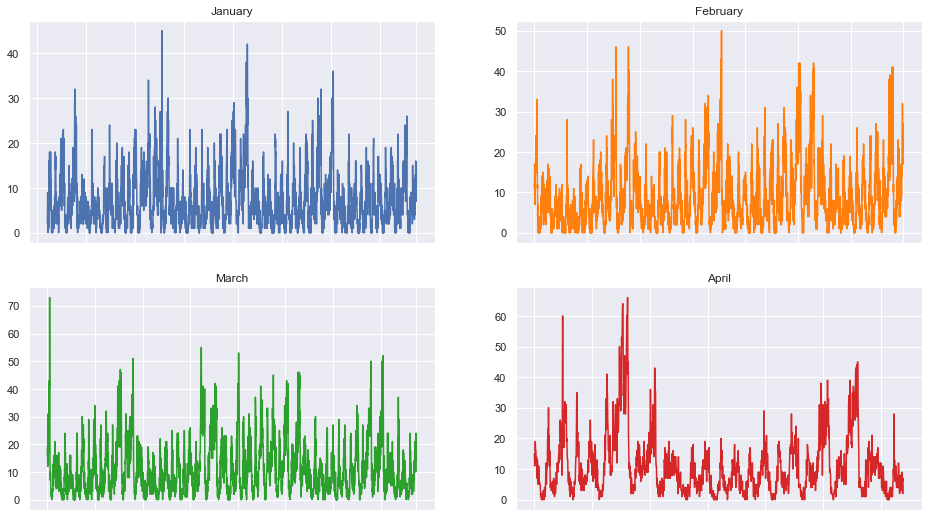

In [10]:
fig, axs = plt.subplots(2, 2,figsize=(16,9))

axs[0, 0].plot(df['1970-01'])
axs[0, 0].set_title('January')
axs[0, 0].set_xticklabels([])
axs[0, 1].plot(df['1970-02'], 'tab:orange')
axs[0, 1].set_title('February')
axs[0, 1].set_xticklabels([])
axs[1, 0].plot(df['1970-03'], 'tab:green')
axs[1, 0].set_title('March')
axs[1, 0].set_xticklabels([])
axs[1, 1].plot(df['1970-04'], 'tab:red')
axs[1, 1].set_title('April')
axs[1, 1].set_xticklabels([])
plt.show()

We can see that we expect weekly as well as daily 

In [11]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['weekday'] = df.index.dayofweek.map(dayOfWeek)

In [12]:
df

,logins,weekday
login_time,,
1970-01-01 20:00:00,2,Thursday
1970-01-01 20:15:00,6,Thursday
1970-01-01 20:30:00,9,Thursday
1970-01-01 20:45:00,7,Thursday
1970-01-01 21:00:00,1,Thursday
...,...,...
1970-04-13 17:45:00,5,Monday
1970-04-13 18:00:00,5,Monday
1970-04-13 18:15:00,2,Monday


To analyze the weekly seasonality, let's plot the first and last full weeks from January, February and March

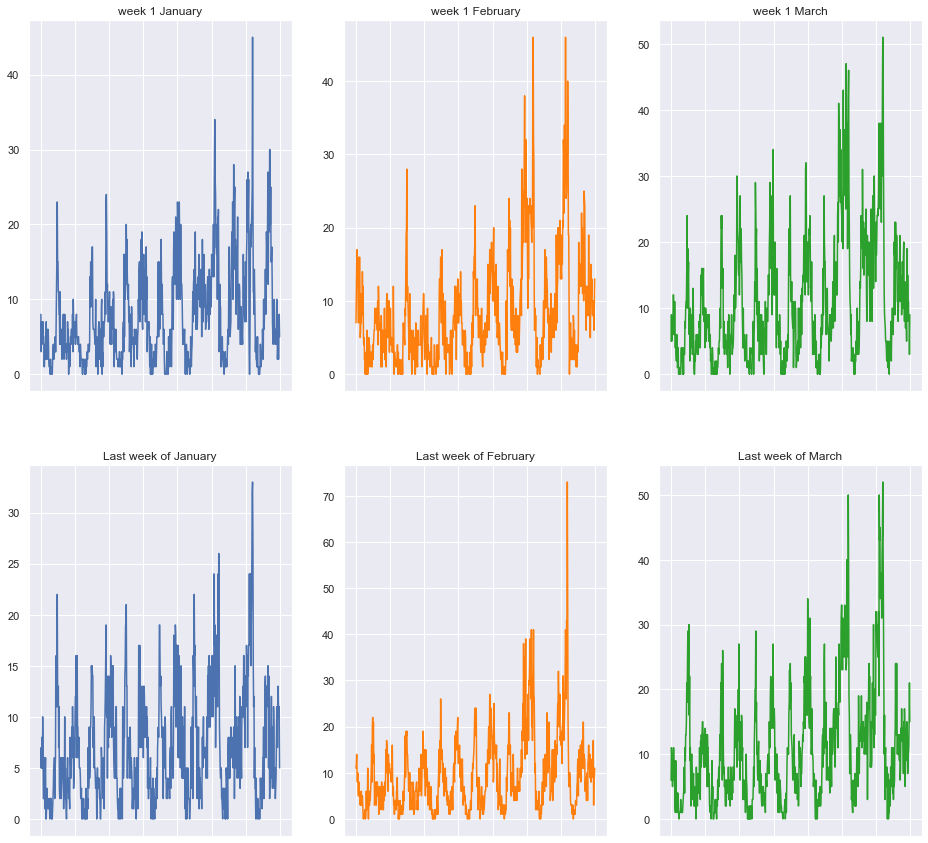

In [13]:
fig, axs = plt.subplots(2, 3,figsize=(16,15))

axs[0, 0].plot(df.loc['1970-01-05':'1970-01-11', 'logins'])
axs[0, 0].set_title('week 1 January')
axs[0, 0].set_xticklabels([])
axs[0, 1].plot(df.loc['1970-02-02' : '1970-02-08','logins'], 'tab:orange')
axs[0, 1].set_title('week 1 February')
axs[0, 1].set_xticklabels([])
axs[0, 2].plot(df.loc['1970-03-02' : '1970-03-08','logins'], 'tab:green')
axs[0, 2].set_title('week 1 March')
axs[0, 2].set_xticklabels([])


axs[1, 0].plot(df.loc['1970-01-26' : '1970-02-01','logins'])
axs[1, 0].set_title('Last week of January')
axs[1, 0].set_xticklabels([])
axs[1, 1].plot(df.loc['1970-02-23' : '1970-03-01','logins'], 'tab:orange')
axs[1, 1].set_title('Last week of February')
axs[1, 1].set_xticklabels([])
axs[1, 2].plot(df.loc['1970-03-23' : '1970-03-29', 'logins'], 'tab:green')
axs[1, 2].set_title('Last week of March')
axs[1, 2].set_xticklabels([])

plt.show()

We can see that in all the weeks selected, **Friday and Saturday have the highest peaks.**

Now let's analyze the daily fluctuations, for each day during a week.

Text(0.5, 1.0, 'Monday')

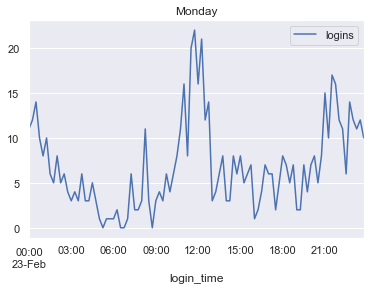

In [14]:
df['1970-02-23'].plot()
plt.title('Monday')

Text(0.5, 1.0, 'Tuesday')

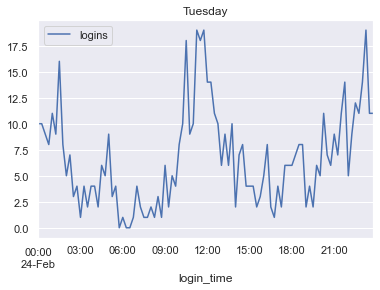

In [15]:
df['1970-02-24'].plot()
plt.title('Tuesday')

Text(0.5, 1.0, 'Wednesday')

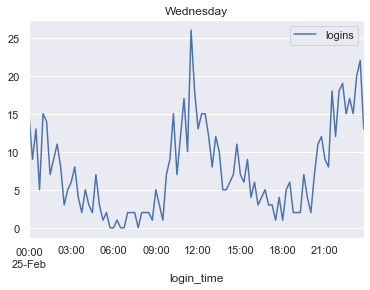

In [16]:
df['1970-02-25'].plot()
plt.title('Wednesday')

Text(0.5, 1.0, 'Thursday')

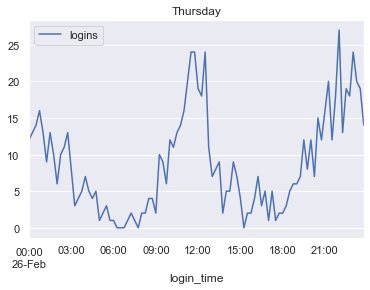

In [17]:
df['1970-02-26'].plot()
plt.title('Thursday')

Text(0.5, 1.0, 'Friday')

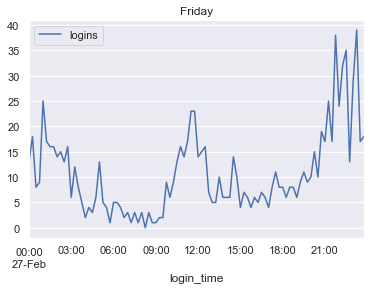

In [18]:
df['1970-02-27'].plot()
plt.title('Friday')

Text(0.5, 1.0, 'Saturday')

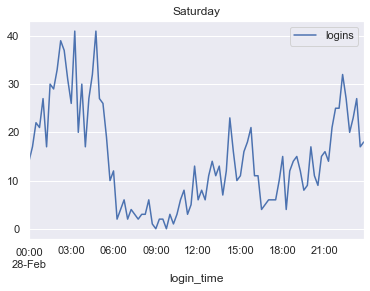

In [19]:
df['1970-02-28'].plot()
plt.title('Saturday')

Text(0.5, 1.0, 'Sunday')

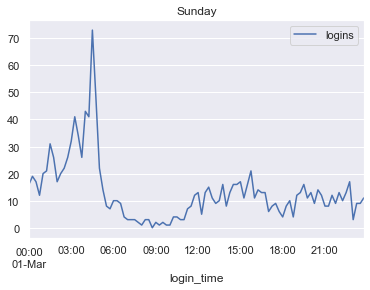

In [20]:
df['1970-03-01'].plot()
plt.title('Sunday')

We can see that during each week day, there 2 prime times for logins: 12am and 12pm.
Starting Friday night, we can observe a lot more logins. Over the weekend we observe 2 major peaks: one Friday night, and another one Sunday morning.
On Sunday morning, around 5:00 am we observe the highest number of logins, above 70 per 15 minutes time span, almost double from any other time of the week.

# Part 2

1. *What would you choose as the key measure of success*

I would clasify the business success KPIs in 3 major categories: Revenue increasing KPIs, Cost of Operation decreasing KPIs or Customer Satisfaction KPIs.
Since this project is actualy going to reimburse money to driver partners, we don't expect a revenue increase.

The most obvious KPIs are those related to Increasing Customer Satisfaction. One one hand, by enabling ride-share partners to easily place themselves in any of the 2 cities will allow their customers to have lower waiting times. Furthermore, the drivers will have more orders therefore more income and a higher desire to be active.

Lastly, a good result of this experiment will eventually decrease the cost of Operations for the City, by reducing the number of Public Transportation available in any of the 2 cities.

As a prefered KPI, I would choose one that can tell us immediately about the succes of the experiment and that is readily available to analyze: toll reimbursments, and distinct drivers using the reimbursments.

With more data collection, we can choose more accurate KPI regarding custoemr satisfaction: Customer Ratings, Customer Wait Time, or others.

2. *Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success.*

a. We will assume we have data regarding custmers' rides, including wait time and ratings. Whis can be easily obtained though a partnership with the ride-share companies.

We will create a A/B testing experiment. We will offer the Reimbursment option to just a random selection of ride-share drivers. It is important that the selection is completely randomized, and the numbers in both groups( Control and Variant groups) are similar: close to 50% each.

Then using the established KPIs: Customer Wait time or Customer Rating(or both) we will records the metrics over a period of time. Usualy 2 weeks, to take into account for weekly seasonality. 



With the data we can run a Statistical Hypothesis Testing. We will asssume the Null Hipothesis to be that there is no difference between the distribution of Customer Rating from the Control Group (those without Reimbursments) and The Variant Group(those with Reimbursments).

b. Ussualy the Customer Ratings falls under a normal Distribution. We can check that in Python by running a normaltest(scipy.stats library) and analyzing the P-value. if this is below 0.05, then the distribution is not normal(Gausian).

If the Distributions are normal, we can simply compare the means and based on that we can calculate the p-value. If this is below 0.05 we can state with 95% confidence that the Null Hypothesis is False, and that we have a significant difference between The Control and Variant Groups.

This concludes that having the Reimbursments program will significantly change the Customers Ratings.



If the 2 distributions are not  normal, then we can do a non-parametrical Permutation Test, and after that we use the same method to compare the Mean Differences and calculate the p-value to reject/accept the Null Hypothesis.

c. Regarding recomandations, the result of the experiment will tell us if applying the program will substantially increase Customer Satisfaction.

The caveats of this are:
* The period we choose for the experiemtn myght not the representative for the whole year(consider holidays, summer-breaks, and others)
* There will be costs that go with the program. We have to put in balance these costs with the effect we want to achieve, and to see if it's worth it.
* Finally, we also have to take into account a future decrease in Operational Costs for the city, assuming a substantial number of clients will choose Ride-share over Public Transportation.

# Part 3

In [21]:
df = pd.io.json.read_json('../ultimate_challenge/ultimate_data_challenge.json', convert_dates=['signup_date', 'last_trip_date'])
df.head().T

,0,1,2,3,4
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
trips_in_first_30_days,4,0,3,9,14
signup_date,2014-01-25 00:00:00,2014-01-29 00:00:00,2014-01-06 00:00:00,2014-01-10 00:00:00,2014-01-27 00:00:00
avg_rating_of_driver,4.7,5,4.3,4.6,4.4
avg_surge,1.1,1,1,1.14,1.19
last_trip_date,2014-06-17 00:00:00,2014-05-05 00:00:00,2014-01-07 00:00:00,2014-06-29 00:00:00,2014-03-15 00:00:00
phone,iPhone,Android,iPhone,iPhone,Android
surge_pct,15.4,0,0,20,11.8
ultimate_black_user,True,False,False,True,False
weekday_pct,46.2,50,100,80,82.4


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

We see there are 3 Features with missing data. Let's see exactly how many 

In [23]:
50000 -df.count()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [24]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [25]:
df.describe(include = 'O')

,city,phone
count,50000,49604
unique,3,2
top,Winterfell,iPhone
freq,23336,34582


In [26]:
df[['signup_date','last_trip_date']].describe(datetime_is_numeric=True)

,signup_date,last_trip_date
count,50000,50000
mean,2014-01-16 13:04:20.352011008,2014-04-19 08:02:04.992004352
min,2014-01-01 00:00:00,2014-01-01 00:00:00
25%,2014-01-09 00:00:00,2014-02-14 00:00:00
50%,2014-01-17 00:00:00,2014-05-08 00:00:00
75%,2014-01-24 00:00:00,2014-06-18 00:00:00
max,2014-01-31 00:00:00,2014-07-01 00:00:00


## Creating the Target Feature

Let's first create the **target feature** : **active**. The problem states that an user is active if he made a trip within 30 days.

We will consider the reference day(2014-07-01) as the last day of a trip made by any customer in our data.
So any customer with last trips after 2014-06-01 is active, and the others are not.

In [27]:
df['active'] = (df.last_trip_date >= pd.to_datetime('2014-06-01')).astype('int')
df.head().T


,0,1,2,3,4
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
trips_in_first_30_days,4,0,3,9,14
signup_date,2014-01-25 00:00:00,2014-01-29 00:00:00,2014-01-06 00:00:00,2014-01-10 00:00:00,2014-01-27 00:00:00
avg_rating_of_driver,4.7,5,4.3,4.6,4.4
avg_surge,1.1,1,1,1.14,1.19
last_trip_date,2014-06-17 00:00:00,2014-05-05 00:00:00,2014-01-07 00:00:00,2014-06-29 00:00:00,2014-03-15 00:00:00
phone,iPhone,Android,iPhone,iPhone,Android
surge_pct,15.4,0,0,20,11.8
ultimate_black_user,True,False,False,True,False
weekday_pct,46.2,50,100,80,82.4


In [28]:
df.active.sum()

18804

In [29]:
df.active.value_counts()

0    31196
1    18804
Name: active, dtype: int64

In [30]:
print('We have ', round(df.active.sum()/df.active.count()*100,2), 'percent active users')

We have  37.61 percent active users


## Dealing with missing data

Let's remove users that have 2 ore more features missing because we consider these records unreliable data.

In [31]:
df = df[df.isnull().sum(axis=1) < 2]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49838 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49838 non-null  object        
 1   trips_in_first_30_days  49838 non-null  int64         
 2   signup_date             49838 non-null  datetime64[ns]
 3   avg_rating_of_driver    41877 non-null  float64       
 4   avg_surge               49838 non-null  float64       
 5   last_trip_date          49838 non-null  datetime64[ns]
 6   phone                   49539 non-null  object        
 7   surge_pct               49838 non-null  float64       
 8   ultimate_black_user     49838 non-null  bool          
 9   weekday_pct             49838 non-null  float64       
 10  avg_dist                49838 non-null  float64       
 11  avg_rating_by_driver    49705 non-null  float64       
 12  active                  49838 non-null  int32 

In [32]:
49838 - df.count()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      7961
avg_surge                    0
last_trip_date               0
phone                      299
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       133
active                       0
dtype: int64

One of the msot common method of filling NANs is to use that feature's mean or median. Before filling the NaNs in **avg_rating_of_driver** and **avg_rating_by_driver** let's rather see if there is a correlation between the 2 features.

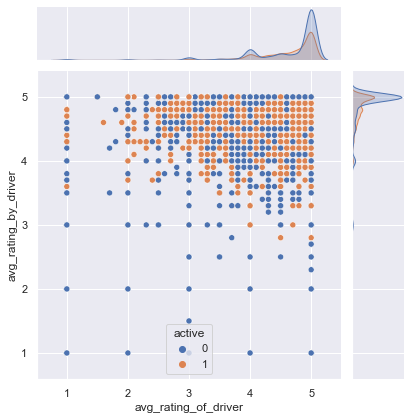

In [33]:
sns.jointplot(data = df, x = 'avg_rating_of_driver', y = 'avg_rating_by_driver', hue = 'active')

As somewhat expected, there is a correlation between how well you rate your driver and how well the driver rates you.
Let's see the difference between these ratings for each driver.

A **rating_diff** above 0 means that the customer was rated higher than he rated the driver.

In [34]:
df.loc[:,'rating_diff'] = df.loc[:,'avg_rating_by_driver'] - df.loc[:,'avg_rating_of_driver']

In [35]:
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,rating_diff
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,0.3
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,0.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,0.7
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,0.3
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1,-0.8
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0,NaN
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0,0.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0,0.5


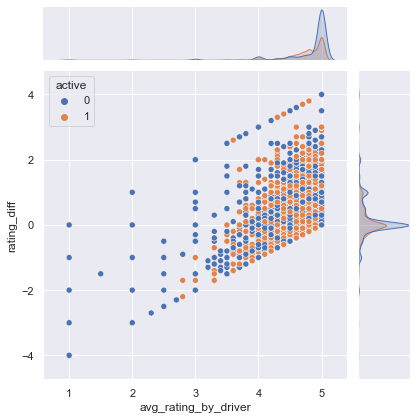

In [36]:
sns.jointplot(data = df, y = 'rating_diff', x = 'avg_rating_by_driver', hue = 'active')

We can see that for both active and inactive customers, the rating difference has a mean close to 0, resulting that as a general rule of thumb, customers and drivers rate each opther similarly.

In [37]:
df.rating_diff.mean()

0.17484668455346744

In [38]:
 49838 - df.count()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      7961
avg_surge                    0
last_trip_date               0
phone                      299
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       133
active                       0
rating_diff               8094
dtype: int64

Let's fill the rating_diff with the mean value.

In [39]:
df.loc[:,'rating_diff'] = df.loc[:,'rating_diff'].fillna(df.rating_diff.mean())

In [40]:
 49838 - df.count()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      7961
avg_surge                    0
last_trip_date               0
phone                      299
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       133
active                       0
rating_diff                  0
dtype: int64

Let's fill the avg_rating_by_driver with the mean value, since we only have 133 missing values. Based on these values and on ratting_diff we can then fill in NaNs in the **avg_rating_of_driver**

In [41]:
df.loc[:,'avg_rating_by_driver'] = df.loc[:,'avg_rating_by_driver'].fillna(round(df.avg_rating_by_driver.mean(), 1))

In [42]:
49838 - df.count()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      7961
avg_surge                    0
last_trip_date               0
phone                      299
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver         0
active                       0
rating_diff                  0
dtype: int64

In [43]:
df.loc[:,'avg_rating_of_driver'] = df.loc[:,'avg_rating_of_driver'].fillna(round(df['avg_rating_by_driver'] - 0.1748, 1))

In [44]:
49838 - df.count()

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     299
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
active                      0
rating_diff                 0
dtype: int64

In [45]:
df.phone.value_counts()

iPhone     34538
Android    15001
Name: phone, dtype: int64

Since more than half the customers have an IPhone, we will fill the missing values with this value.

In [46]:
df.loc[:,'phone'] = df.loc[:,'phone'].fillna('iPhone')

In [47]:
49838 - df.count()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
active                    0
rating_diff               0
dtype: int64

## Short EDA

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49838 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49838 non-null  object        
 1   trips_in_first_30_days  49838 non-null  int64         
 2   signup_date             49838 non-null  datetime64[ns]
 3   avg_rating_of_driver    49838 non-null  float64       
 4   avg_surge               49838 non-null  float64       
 5   last_trip_date          49838 non-null  datetime64[ns]
 6   phone                   49838 non-null  object        
 7   surge_pct               49838 non-null  float64       
 8   ultimate_black_user     49838 non-null  bool          
 9   weekday_pct             49838 non-null  float64       
 10  avg_dist                49838 non-null  float64       
 11  avg_rating_by_driver    49838 non-null  float64       
 12  active                  49838 non-null  int32 

In [49]:
df['ultimate_black_user'] = df['ultimate_black_user'].astype('int')

<AxesSubplot:>

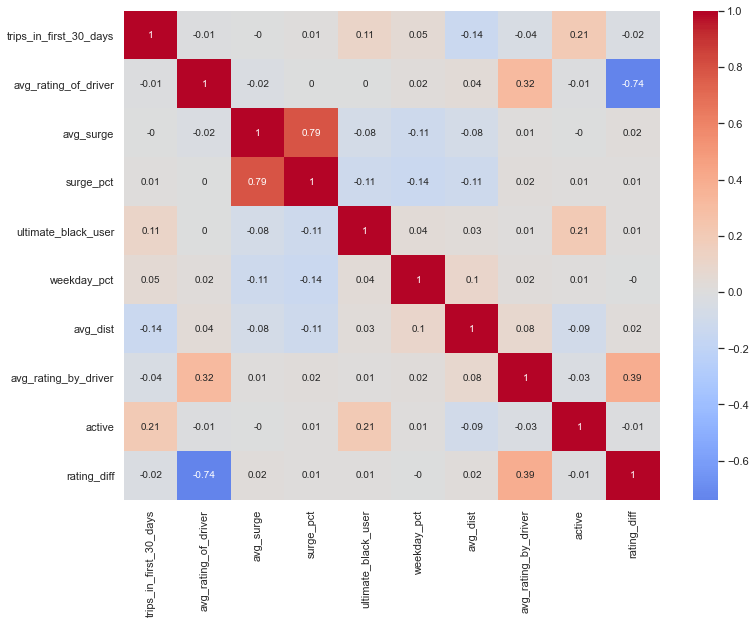

In [50]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(round(df.corr(), 2), center = 0, cmap="coolwarm", annot = True, annot_kws={'size': 10})

We can see our target feature **active** has a similar high positive correlation with **trips_in_first_30_days** and **ultimate_black_user**

As final pre-processing steps, we will have to drop these features:
* signup_date because they all signed up in January.
* last_trip_date because it is the feature from which we compiled our Target feature.


Before that let's create a day_of_week for signup_date to use it in our modeling.


In [51]:
df['day_of_week_signup'] = df.signup_date.dt.day_name()

In [52]:
df.head().T

,0,1,2,3,4
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
trips_in_first_30_days,4,0,3,9,14
signup_date,2014-01-25 00:00:00,2014-01-29 00:00:00,2014-01-06 00:00:00,2014-01-10 00:00:00,2014-01-27 00:00:00
avg_rating_of_driver,4.7,5,4.3,4.6,4.4
avg_surge,1.1,1,1,1.14,1.19
last_trip_date,2014-06-17 00:00:00,2014-05-05 00:00:00,2014-01-07 00:00:00,2014-06-29 00:00:00,2014-03-15 00:00:00
phone,iPhone,Android,iPhone,iPhone,Android
surge_pct,15.4,0,0,20,11.8
ultimate_black_user,1,0,0,1,0
weekday_pct,46.2,50,100,80,82.4


In [53]:
df = df.drop(['signup_date', 'last_trip_date'], axis=1)
df

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,rating_diff,day_of_week_signup
0,King's Landing,4,4.7,1.10,iPhone,15.4,1,46.2,3.67,5.0,1,0.300000,Saturday
1,Astapor,0,5.0,1.00,Android,0.0,0,50.0,8.26,5.0,0,0.000000,Wednesday
2,Astapor,3,4.3,1.00,iPhone,0.0,0,100.0,0.77,5.0,0,0.700000,Monday
3,King's Landing,9,4.6,1.14,iPhone,20.0,1,80.0,2.36,4.9,1,0.300000,Friday
4,Winterfell,14,4.4,1.19,Android,11.8,0,82.4,3.13,4.9,0,0.500000,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,5.0,1.00,iPhone,0.0,0,100.0,5.63,4.2,1,-0.800000,Saturday
49996,Astapor,1,3.8,1.00,iPhone,0.0,0,0.0,0.00,4.0,0,0.174847,Friday
49997,Winterfell,0,5.0,1.00,Android,0.0,1,100.0,3.86,5.0,0,0.000000,Friday
49998,Astapor,2,3.0,1.00,iPhone,0.0,0,100.0,4.58,3.5,0,0.500000,Tuesday


We will use get_dummies for the 2 categorical features.

In [54]:
df = pd.get_dummies(df, drop_first=True)
df

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,rating_diff,city_King's Landing,city_Winterfell,phone_iPhone,day_of_week_signup_Monday,day_of_week_signup_Saturday,day_of_week_signup_Sunday,day_of_week_signup_Thursday,day_of_week_signup_Tuesday,day_of_week_signup_Wednesday
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,0.300000,1,0,1,0,1,0,0,0,0
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,0.000000,0,0,0,0,0,0,0,0,1
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,0.700000,0,0,1,1,0,0,0,0,0
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,0.300000,1,0,1,0,0,0,0,0,0
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0.500000,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,5.0,1.00,0.0,0,100.0,5.63,4.2,1,-0.800000,1,0,1,0,1,0,0,0,0
49996,1,3.8,1.00,0.0,0,0.0,0.00,4.0,0,0.174847,0,0,1,0,0,0,0,0,0
49997,0,5.0,1.00,0.0,1,100.0,3.86,5.0,0,0.000000,0,1,0,0,0,0,0,0,0
49998,2,3.0,1.00,0.0,0,100.0,4.58,3.5,0,0.500000,0,0,1,0,0,0,0,1,0


<AxesSubplot:>

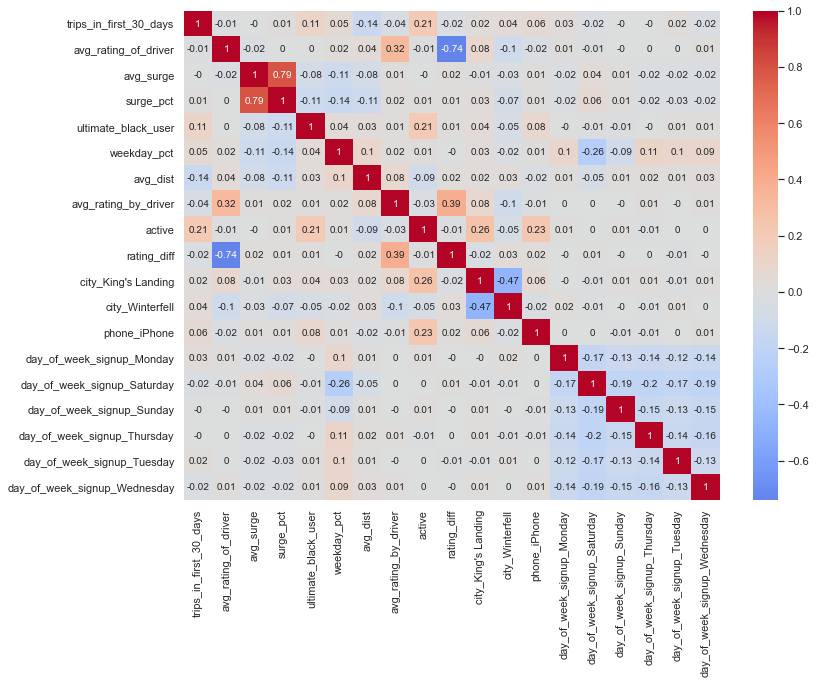

In [55]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(round(df.corr(), 2), center = 0, cmap="coolwarm", annot = True, annot_kws={'size': 10})

## Modeling

For our modeling we will only use 2 models: RFT and XGBoost.

In [56]:
import time
import shap
np.random.seed(123)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import xgboost as xgb

We will create a metrics function that will output the Accuracy scores, Classification report, normalized confusion matrix, roc score and ROC graph.

Then it will save these score in the results DataFrame.

In [57]:
results = pd.DataFrame(columns = ['model','Accuracy', 'ROC_auc'])
pd.set_option("max_colwidth", 100)

def metrics(model):
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    roc_score = round(roc_auc_score(y_test, y_pred_prob),4)
    acc = round(accuracy_score(y_test,y_pred),4)
    
    print("Accuracy score:", acc)
   
    print('Validation - Classification report\n', classification_report(y_test,y_pred))
    plt.figure(figsize=(9,9))
    plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = 'Blues')
    plt.show()
    
    print('Test - Area under ROC score: {}'.format(roc_score))
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(6,6))
    plt.plot(fpr_test, tpr_test, label = 'Test ROC', c = 'r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('{} ROC Curve'.format(model))
    
    new_row = {'model':model,
               'Accuracy': acc,
               'ROC_auc': roc_score}
    results.loc[0 if pd.isnull(results.index.max()) else results.index.max() + 1] = new_row

In [58]:
X = df.drop('active', axis=1)
        
y = df['active']
X.shape, y.shape

((49838, 18), (49838,))

Train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Applying a StandardScaler to X_train, then transforming both train and test data. 

In [60]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [61]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

Accuracy score: 0.7194
Validation - Classification report
               precision    recall  f1-score   support

           0       0.74      0.85      0.79      9338
           1       0.67      0.50      0.57      5614

    accuracy                           0.72     14952
   macro avg       0.70      0.67      0.68     14952
weighted avg       0.71      0.72      0.71     14952



<Figure size 648x648 with 0 Axes>

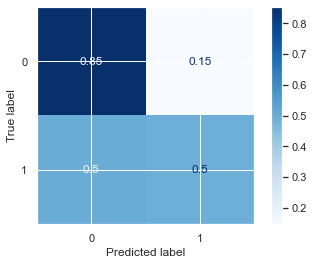

Test - Area under ROC score: 0.7628


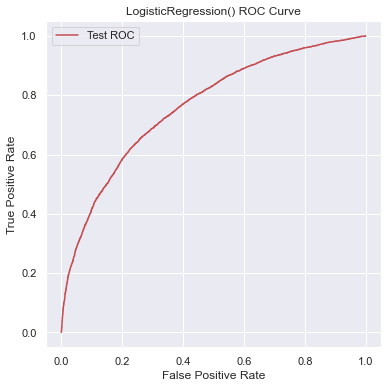

In [62]:
metrics(logreg)

In [63]:
results

,model,Accuracy,ROC_auc
0,LogisticRegression(),0.7194,0.7628


In [64]:
grid={"C":np.logspace(-3,3,7)}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

Accuracy score: 0.7198
Validation - Classification report
               precision    recall  f1-score   support

           0       0.74      0.85      0.79      9338
           1       0.67      0.50      0.57      5614

    accuracy                           0.72     14952
   macro avg       0.71      0.68      0.68     14952
weighted avg       0.71      0.72      0.71     14952



<Figure size 648x648 with 0 Axes>

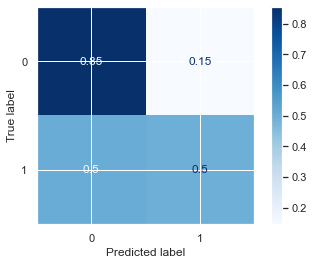

Test - Area under ROC score: 0.7629


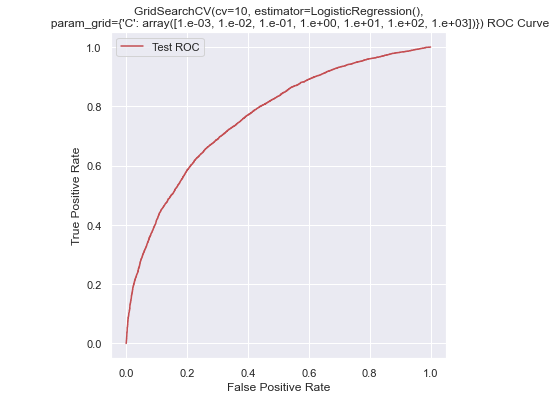

In [65]:
metrics(logreg_cv)

In [66]:
results

,model,Accuracy,ROC_auc
0,LogisticRegression(),0.7194,0.7628
1,"GridSearchCV(cv=10, estimator=LogisticRegression(),\n param_grid={'C': array([1.e-03...",0.7198,0.7629


### KNN

---------------Test scores : KNeighborsClassifier model with 3 neighbors--------------
Accuracy score: 0.7248
Validation - Classification report
               precision    recall  f1-score   support

           0       0.77      0.80      0.78      9338
           1       0.64      0.61      0.62      5614

    accuracy                           0.72     14952
   macro avg       0.71      0.70      0.70     14952
weighted avg       0.72      0.72      0.72     14952



<Figure size 648x648 with 0 Axes>

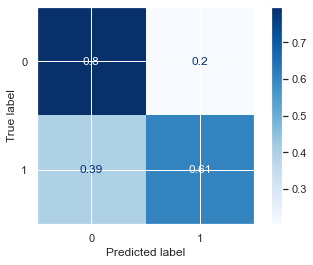

Test - Area under ROC score: 0.7511
44.078125 seconds
---------------Test scores : KNeighborsClassifier model with 11 neighbors--------------
Accuracy score: 0.7439
Validation - Classification report
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      9338
           1       0.68      0.61      0.64      5614

    accuracy                           0.74     14952
   macro avg       0.73      0.72      0.72     14952
weighted avg       0.74      0.74      0.74     14952



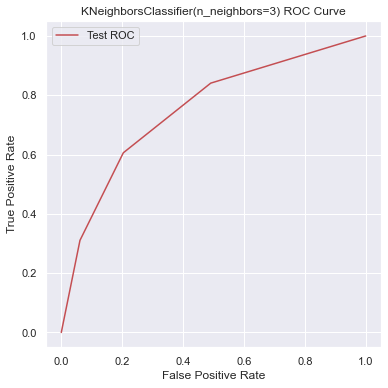

<Figure size 648x648 with 0 Axes>

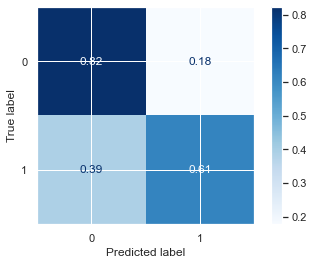

Test - Area under ROC score: 0.7956
82.96875 seconds
---------------Test scores : KNeighborsClassifier model with 20 neighbors--------------
Accuracy score: 0.7488
Validation - Classification report
               precision    recall  f1-score   support

           0       0.77      0.84      0.81      9338
           1       0.69      0.59      0.64      5614

    accuracy                           0.75     14952
   macro avg       0.73      0.72      0.72     14952
weighted avg       0.74      0.75      0.74     14952



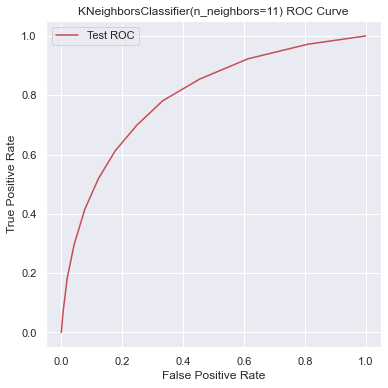

<Figure size 648x648 with 0 Axes>

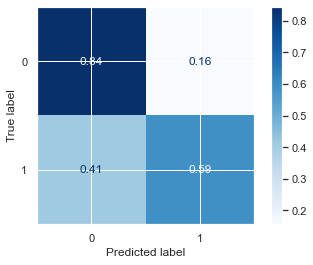

Test - Area under ROC score: 0.8031
95.578125 seconds
---------------Test scores : KNeighborsClassifier model with 26 neighbors--------------
Accuracy score: 0.7495
Validation - Classification report
               precision    recall  f1-score   support

           0       0.78      0.84      0.81      9338
           1       0.69      0.60      0.64      5614

    accuracy                           0.75     14952
   macro avg       0.73      0.72      0.72     14952
weighted avg       0.75      0.75      0.75     14952



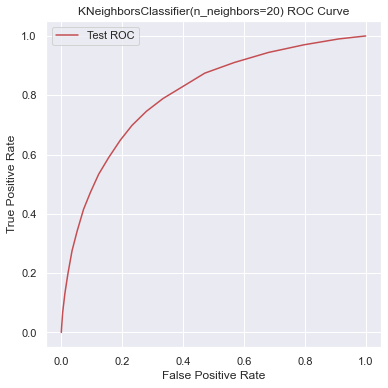

<Figure size 648x648 with 0 Axes>

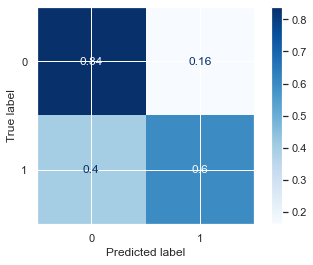

Test - Area under ROC score: 0.8042
105.21875 seconds
---------------Test scores : KNeighborsClassifier model with 32 neighbors--------------
Accuracy score: 0.7491
Validation - Classification report
               precision    recall  f1-score   support

           0       0.78      0.84      0.81      9338
           1       0.69      0.60      0.64      5614

    accuracy                           0.75     14952
   macro avg       0.73      0.72      0.72     14952
weighted avg       0.74      0.75      0.75     14952



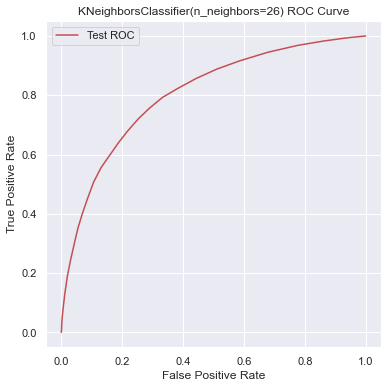

<Figure size 648x648 with 0 Axes>

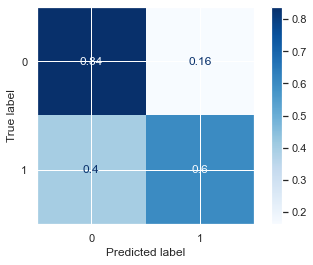

Test - Area under ROC score: 0.8043
119.546875 seconds
---------------Test scores : KNeighborsClassifier model with 40 neighbors--------------
Accuracy score: 0.7515
Validation - Classification report
               precision    recall  f1-score   support

           0       0.78      0.84      0.81      9338
           1       0.70      0.60      0.65      5614

    accuracy                           0.75     14952
   macro avg       0.74      0.72      0.73     14952
weighted avg       0.75      0.75      0.75     14952



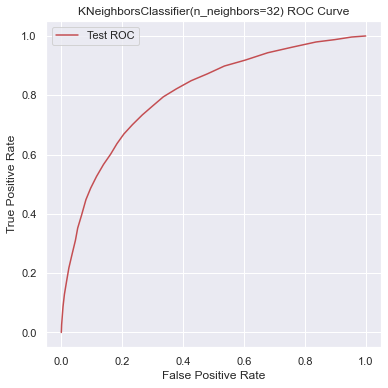

<Figure size 648x648 with 0 Axes>

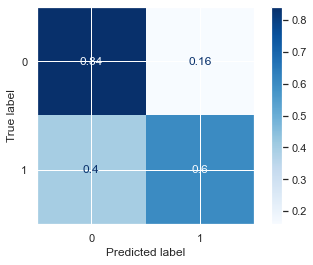

Test - Area under ROC score: 0.8037
143.265625 seconds
---------------Test scores : KNeighborsClassifier model with 56 neighbors--------------
Accuracy score: 0.7508
Validation - Classification report
               precision    recall  f1-score   support

           0       0.78      0.84      0.81      9338
           1       0.69      0.60      0.64      5614

    accuracy                           0.75     14952
   macro avg       0.74      0.72      0.73     14952
weighted avg       0.75      0.75      0.75     14952



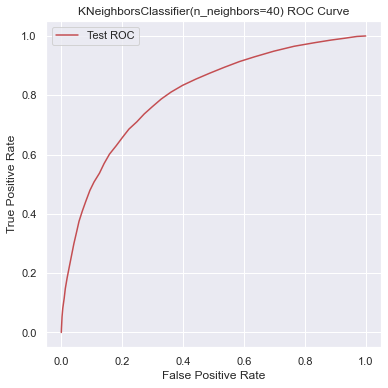

<Figure size 648x648 with 0 Axes>

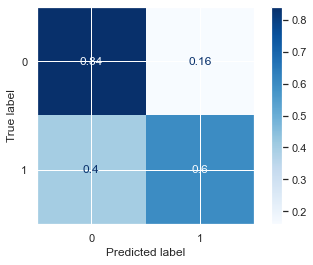

Test - Area under ROC score: 0.8013
156.671875 seconds


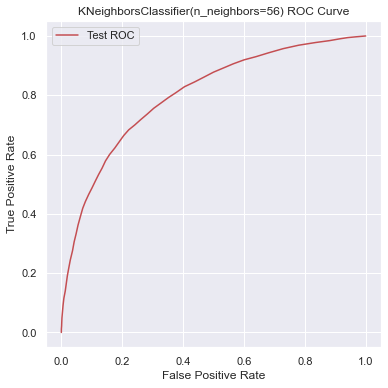

In [67]:
no_neighbors = (3,11,20,26,32,40,56)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))
train_ROC = np.empty(len(no_neighbors))
test_ROC = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    start = time.process_time()  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)
    y_pred_prob = knn.predict_proba(X_test)[:,1]
    
    y_tr_pred = knn.predict(X_train)
    y_tr_pred_prob = knn.predict_proba(X_train)[:,1]
    

    train_roc_score = round(roc_auc_score(y_train, y_tr_pred_prob),4)
    test_roc_score = round(roc_auc_score(y_test, y_pred_prob),4)
    train_acc = round(accuracy_score(y_train,y_tr_pred),4)
    test_acc = round(accuracy_score(y_test,y_pred),4)
    
    train_accuracy[i] = train_acc
    test_accuracy[i] = test_acc
    train_ROC[i] = train_roc_score
    test_ROC[i] = test_roc_score

    
    print('---------------Test scores : KNeighborsClassifier model with {} neighbors--------------'.format(k))
    metrics(knn)
    
    print(time.process_time() - start, 'seconds')



Let's visualize the metrics from our KNN classifiers.

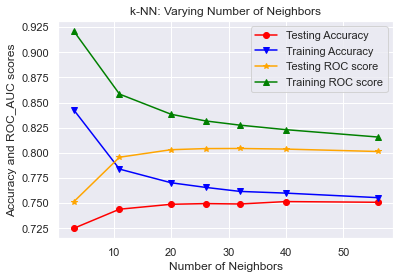

In [68]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy', marker = 'o', c = 'red')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy', marker = 'v', c = 'blue')
plt.plot(no_neighbors, test_ROC, label = 'Testing ROC score', marker = '*', c = 'orange')
plt.plot(no_neighbors, train_ROC, label = 'Training ROC score', marker = '^', c = 'green')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy and ROC_AUC scores')
plt.show()

Random Forest Classifier

In [69]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

Accuracy score: 0.7645
Validation - Classification report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      9338
           1       0.70      0.65      0.68      5614

    accuracy                           0.76     14952
   macro avg       0.75      0.74      0.75     14952
weighted avg       0.76      0.76      0.76     14952



<Figure size 648x648 with 0 Axes>

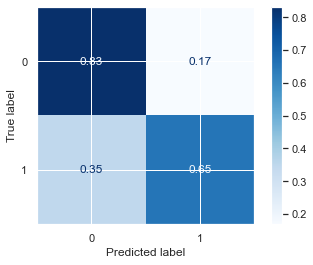

Test - Area under ROC score: 0.8277


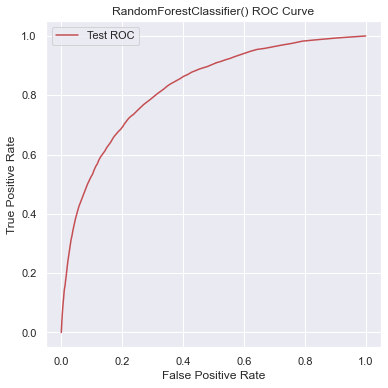

In [70]:
metrics(rfc)

Hyper-parameter tunning on RFC

---------Train & Test scores : RFC model with n_estimators = 50 and max_depth = 10 ---------
Accuracy score: 0.7818
Validation - Classification report
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      9338
           1       0.74      0.64      0.69      5614

    accuracy                           0.78     14952
   macro avg       0.77      0.75      0.76     14952
weighted avg       0.78      0.78      0.78     14952



<Figure size 648x648 with 0 Axes>

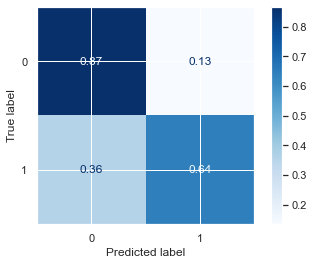

Test - Area under ROC score: 0.8488
---------Train & Test scores : RFC model with n_estimators = 100 and max_depth = 10 ---------
Accuracy score: 0.7826
Validation - Classification report
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      9338
           1       0.74      0.64      0.69      5614

    accuracy                           0.78     14952
   macro avg       0.77      0.75      0.76     14952
weighted avg       0.78      0.78      0.78     14952



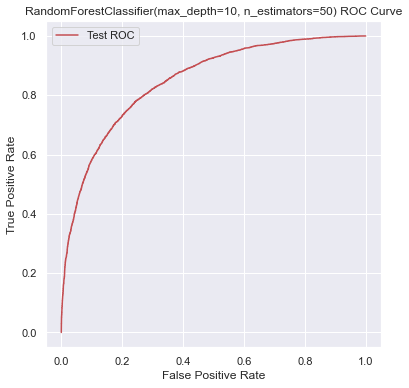

<Figure size 648x648 with 0 Axes>

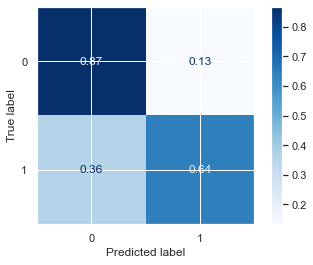

Test - Area under ROC score: 0.8488
---------Train & Test scores : RFC model with n_estimators = 200 and max_depth = 10 ---------
Accuracy score: 0.7832
Validation - Classification report
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      9338
           1       0.75      0.64      0.69      5614

    accuracy                           0.78     14952
   macro avg       0.77      0.75      0.76     14952
weighted avg       0.78      0.78      0.78     14952



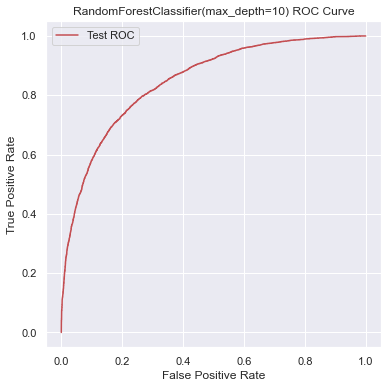

<Figure size 648x648 with 0 Axes>

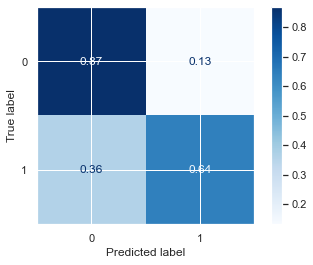

Test - Area under ROC score: 0.8495
---------Train & Test scores : RFC model with n_estimators = 400 and max_depth = 10 ---------
Accuracy score: 0.7819
Validation - Classification report
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      9338
           1       0.74      0.64      0.69      5614

    accuracy                           0.78     14952
   macro avg       0.77      0.75      0.76     14952
weighted avg       0.78      0.78      0.78     14952



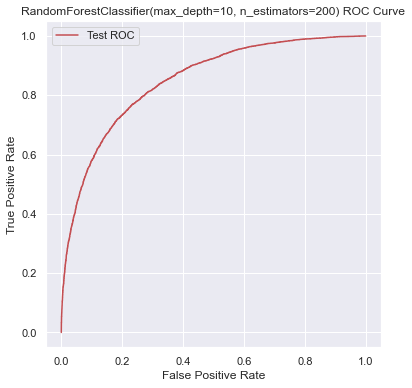

<Figure size 648x648 with 0 Axes>

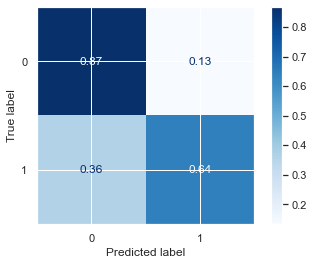

Test - Area under ROC score: 0.8499
---------Train & Test scores : RFC model with n_estimators = 50 and max_depth = 20 ---------
Accuracy score: 0.7686
Validation - Classification report
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      9338
           1       0.71      0.65      0.68      5614

    accuracy                           0.77     14952
   macro avg       0.75      0.75      0.75     14952
weighted avg       0.77      0.77      0.77     14952



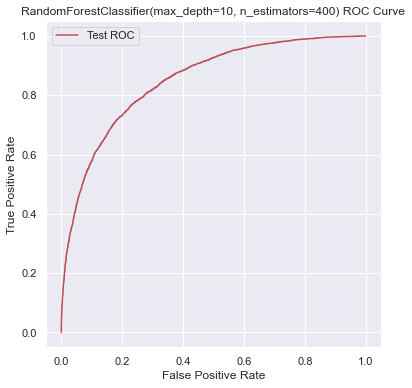

<Figure size 648x648 with 0 Axes>

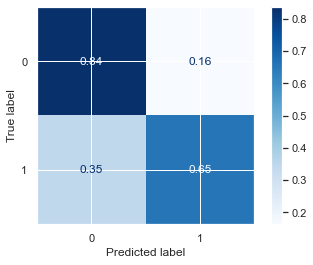

Test - Area under ROC score: 0.8335
---------Train & Test scores : RFC model with n_estimators = 100 and max_depth = 20 ---------
Accuracy score: 0.7724
Validation - Classification report
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      9338
           1       0.71      0.66      0.68      5614

    accuracy                           0.77     14952
   macro avg       0.76      0.75      0.75     14952
weighted avg       0.77      0.77      0.77     14952



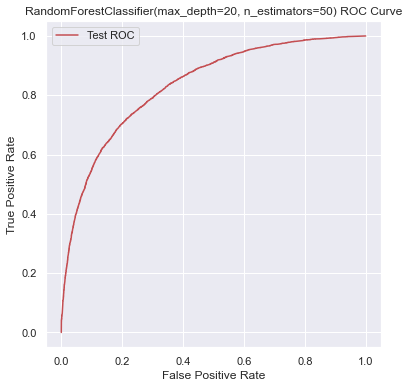

<Figure size 648x648 with 0 Axes>

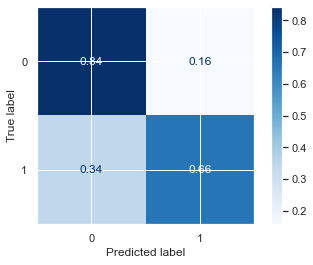

Test - Area under ROC score: 0.8362
---------Train & Test scores : RFC model with n_estimators = 200 and max_depth = 20 ---------
Accuracy score: 0.7723
Validation - Classification report
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      9338
           1       0.71      0.66      0.68      5614

    accuracy                           0.77     14952
   macro avg       0.76      0.75      0.75     14952
weighted avg       0.77      0.77      0.77     14952



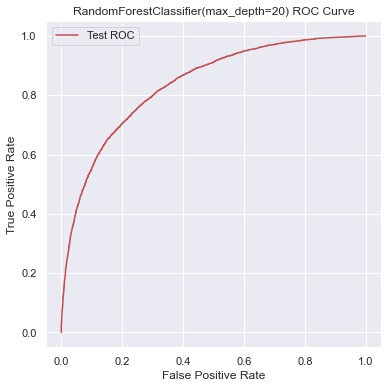

<Figure size 648x648 with 0 Axes>

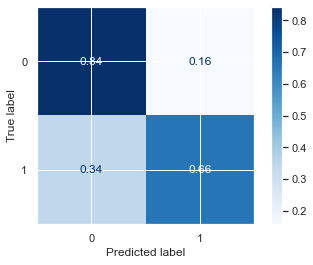

Test - Area under ROC score: 0.8365
---------Train & Test scores : RFC model with n_estimators = 400 and max_depth = 20 ---------
Accuracy score: 0.7743
Validation - Classification report
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      9338
           1       0.72      0.66      0.69      5614

    accuracy                           0.77     14952
   macro avg       0.76      0.75      0.76     14952
weighted avg       0.77      0.77      0.77     14952



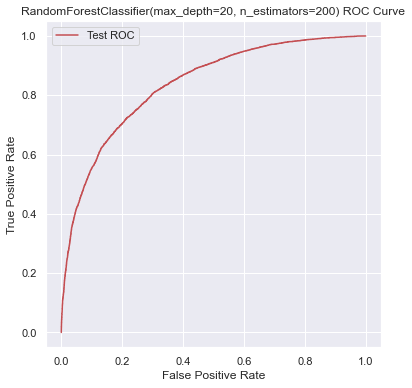

<Figure size 648x648 with 0 Axes>

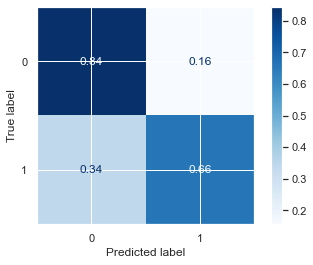

Test - Area under ROC score: 0.8384
---------Train & Test scores : RFC model with n_estimators = 50 and max_depth = None ---------
Accuracy score: 0.7627
Validation - Classification report
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      9338
           1       0.70      0.65      0.67      5614

    accuracy                           0.76     14952
   macro avg       0.75      0.74      0.74     14952
weighted avg       0.76      0.76      0.76     14952



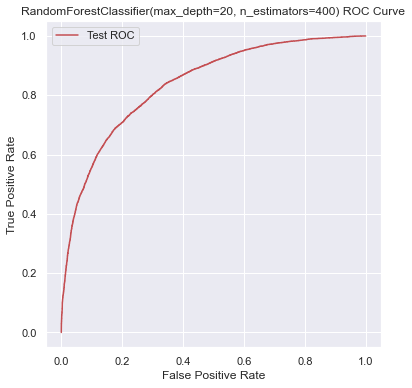

<Figure size 648x648 with 0 Axes>

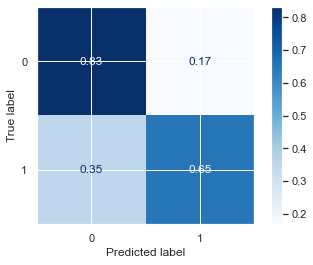

Test - Area under ROC score: 0.8251
---------Train & Test scores : RFC model with n_estimators = 100 and max_depth = None ---------
Accuracy score: 0.7607
Validation - Classification report
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      9338
           1       0.69      0.65      0.67      5614

    accuracy                           0.76     14952
   macro avg       0.75      0.74      0.74     14952
weighted avg       0.76      0.76      0.76     14952



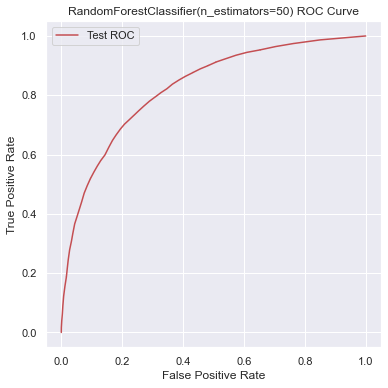

<Figure size 648x648 with 0 Axes>

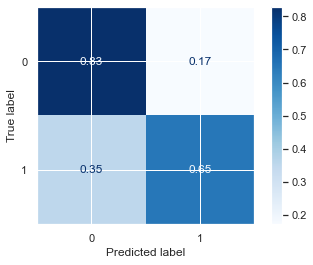

Test - Area under ROC score: 0.8279
---------Train & Test scores : RFC model with n_estimators = 200 and max_depth = None ---------
Accuracy score: 0.7643
Validation - Classification report
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      9338
           1       0.70      0.65      0.68      5614

    accuracy                           0.76     14952
   macro avg       0.75      0.74      0.75     14952
weighted avg       0.76      0.76      0.76     14952



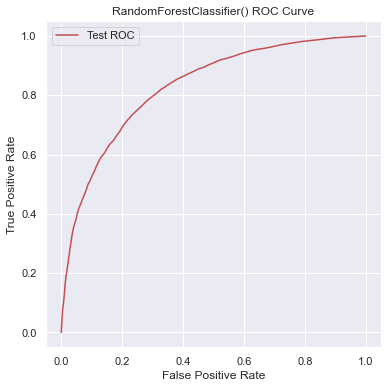

<Figure size 648x648 with 0 Axes>

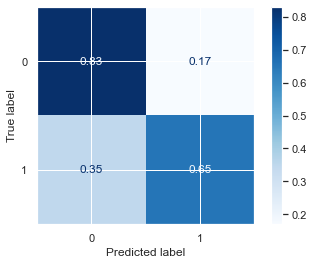

Test - Area under ROC score: 0.8295
---------Train & Test scores : RFC model with n_estimators = 400 and max_depth = None ---------
Accuracy score: 0.7662
Validation - Classification report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      9338
           1       0.70      0.66      0.68      5614

    accuracy                           0.77     14952
   macro avg       0.75      0.75      0.75     14952
weighted avg       0.76      0.77      0.76     14952



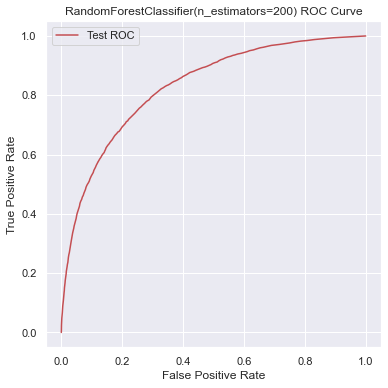

<Figure size 648x648 with 0 Axes>

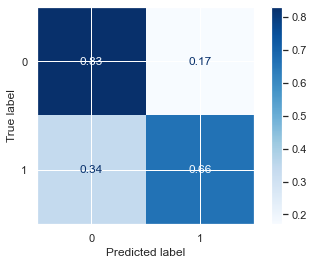

Test - Area under ROC score: 0.8301


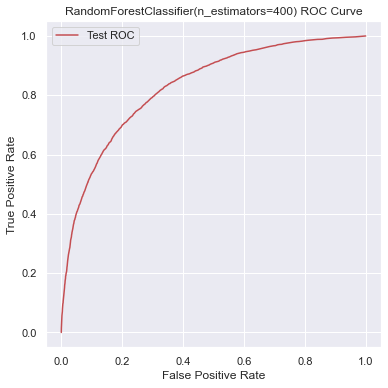

In [72]:
depth = [10, 20, None]
estimators = [50,100,200,400]

for d in depth:
    for e in estimators:
        print('---------Train & Test scores : RFC model with n_estimators = {} and max_depth = {} ---------'.format(e, d))
        rfc_i = RandomForestClassifier(n_estimators = e, max_depth = d)
        rfc_i.fit(X_train, y_train)
        y_pred = rfc_i.predict(X_test)
        metrics(rfc_i)

XGBoost

In [78]:
params = {
    'max_depth': [None, 10, 50, 100],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'min_child_weight': [0.5, 1.0, 3.0, 5.0],
    'gamma': [0, 0.25, 0.5, 1.0],
    'n_estimators': [10, 20, 50, 100],
    'colsample_bytree': [0.5, 0.7, 0.8, 0.9, 1],
    'objective': ['binary:logistic']
}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False)
xgb_cv = RandomizedSearchCV(xgb_clf, params, cv=3, verbose=5, scoring='roc_auc', random_state=1)

xgb_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] objective=binary:logistic, n_estimators=20, min_child_weight=1.0, max_depth=50, learning_rate=0.001, gamma=0, colsample_bytree=1 
[22:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  objective=binary:logistic, n_estimators=20, min_child_weight=1.0, max_depth=50, learning_rate=0.001, gamma=0, colsample_bytree=1, score=0.814, total=   1.2s
[CV] objective=binary:logistic, n_estimators=20, min_child_weight=1.0, max_depth=50, learning_rate=0.001, gamma=0, colsample_bytree=1 
[22:31:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  objective=binary:logistic, n_estimators=20, min_child_weight=1.0, max_depth=50, learning_rate=0.001, gamma=0, colsample_bytree=1, score=0.806, total=   1.3s
[CV] objective=binary:logistic, n_estimators=20, min_child_weight=1.0, max_depth=50, learning_rate=0.001, gamma=0, colsample_bytree=1 
[22:31:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV]  objective=binary:logistic, n_estimators=20, min_child_weight=1.0, max_depth=50, learning_rate=0.001, gamma=0, colsample_bytree=1, score=0.812, total=   1.2s
[CV] objective=binary:logistic, n_estimators=100, min_child_weight=3.0, max_depth=50, learning_rate=0.2, gamma=0, colsample_bytree=0.5 
[22:31:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s remaining:    0.0s


[CV]  objective=binary:logistic, n_estimators=100, min_child_weight=3.0, max_depth=50, learning_rate=0.2, gamma=0, colsample_bytree=0.5, score=0.834, total=   3.6s
[CV] objective=binary:logistic, n_estimators=100, min_child_weight=3.0, max_depth=50, learning_rate=0.2, gamma=0, colsample_bytree=0.5 
[22:31:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.2s remaining:    0.0s


[CV]  objective=binary:logistic, n_estimators=100, min_child_weight=3.0, max_depth=50, learning_rate=0.2, gamma=0, colsample_bytree=0.5, score=0.834, total=   3.7s
[CV] objective=binary:logistic, n_estimators=100, min_child_weight=3.0, max_depth=50, learning_rate=0.2, gamma=0, colsample_bytree=0.5 
[22:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  objective=binary:logistic, n_estimators=100, min_child_weight=3.0, max_depth=50, learning_rate=0.2, gamma=0, colsample_bytree=0.5, score=0.833, total=   3.7s
[CV] objective=binary:logistic, n_estimators=10, min_child_weight=5.0, max_depth=None, learning_rate=0.1, gamma=0, colsample_bytree=0.9 
[22:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/lear

[CV]  objective=binary:logistic, n_estimators=100, min_child_weight=5.0, max_depth=None, learning_rate=0.001, gamma=0.25, colsample_bytree=0.8, score=0.837, total=   1.0s
[CV] objective=binary:logistic, n_estimators=100, min_child_weight=5.0, max_depth=None, learning_rate=0.001, gamma=0.25, colsample_bytree=0.8 
[22:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  objective=binary:logistic, n_estimators=100, min_child_weight=5.0, max_depth=None, learning_rate=0.001, gamma=0.25, colsample_bytree=0.8, score=0.841, total=   1.1s
[CV] objective=binary:logistic, n_estimators=100, min_child_weight=5.0, max_depth=None, learning_rate=0.001, gamma=0.25, colsample_bytree=0.8 
[22:31:59] WARNING: C:/Users/Administrator/workspace/xgboost-w

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   24.2s finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           use_label_encoder=False,
                                           validate_parameters=None,
                                           v

In [76]:
pd.DataFrame(xgb_cv.cv_results_).sort_values('rank_test_score').T

,5,4,7,8,2,6,9,1,3,0
mean_fit_time,0.854574,0.20084,0.130944,0.269026,0.135319,0.988057,0.231966,3.88786,0.141286,1.16855
std_fit_time,0.0296357,0.00760883,0.00497793,0.003065,0.00527692,0.00818547,0.00293264,0.120632,0.00035525,0.0199041
mean_score_time,0.0182835,0.0159856,0.015467,0.0156242,0.01499,0.0185931,0.0156251,0.039783,0.0137271,0.0161966
std_score_time,0.00124562,0.000780318,0.00106912,0.00169514,4.37221e-05,0.000504751,0.000940156,0.00412989,0.000429283,0.00129281
param_objective,binary:logistic,binary:logistic,binary:logistic,binary:logistic,binary:logistic,binary:logistic,binary:logistic,binary:logistic,binary:logistic,binary:logistic
param_n_estimators,100,20,10,10,10,100,20,100,10,20
param_min_child_weight,3,3,0.5,0.5,5,5,0.5,3,3,1
param_max_depth,None,None,None,10,None,None,None,50,None,50
param_learning_rate,0.2,0.3,0.3,0.1,0.1,0.001,0.01,0.2,0.01,0.001
param_gamma,0,0.5,1,0,0,0.25,0.25,0,0,0


Choosing the next XGBoost estimator

In [80]:
best_xgb = xgb_cv.best_estimator_

In [82]:

best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

[22:35:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy score: 0.792
Validation - Classification report
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      9338
           1       0.75      0.67      0.71      5614

    accuracy                           0.79     14952
   macro avg       0.78      0.77      0.77     14952
weighted avg       0.79      0.79      0.79     14952



<Figure size 648x648 with 0 Axes>

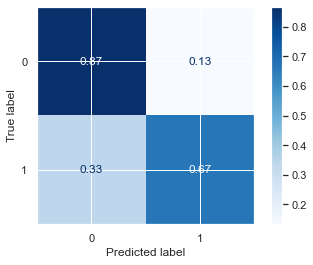

Test - Area under ROC score: 0.8577


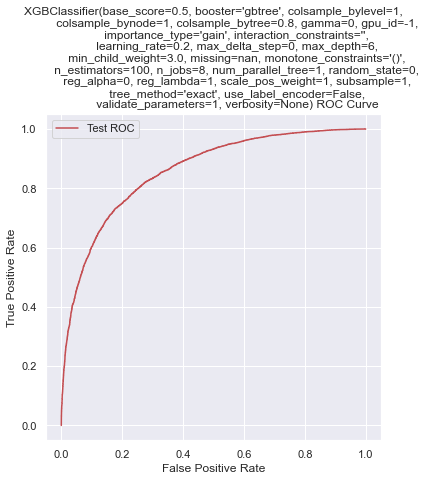

In [83]:
metrics(best_xgb)

Model Selection and Evaluation

In [86]:
results.sort_values('ROC_auc', ascending = False)

,model,Accuracy,ROC_auc
22,"XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n colsample_by...",0.7920,0.8577
13,"(DecisionTreeClassifier(max_depth=10, max_features='auto',\n random_state=...",0.7819,0.8499
12,"(DecisionTreeClassifier(max_depth=10, max_features='auto',\n random_state=...",0.7832,0.8495
10,"(DecisionTreeClassifier(max_depth=10, max_features='auto',\n random_state=...",0.7818,0.8488
11,"(DecisionTreeClassifier(max_depth=10, max_features='auto',\n random_state=...",0.7826,0.8488
17,"(DecisionTreeClassifier(max_depth=20, max_features='auto',\n random_state=...",0.7743,0.8384
16,"(DecisionTreeClassifier(max_depth=20, max_features='auto',\n random_state=...",0.7723,0.8365
15,"(DecisionTreeClassifier(max_depth=20, max_features='auto',\n random_state=...",0.7724,0.8362
14,"(DecisionTreeClassifier(max_depth=20, max_features='auto',\n random_state=...",0.7686,0.8335
21,"(DecisionTreeClassifier(max_features='auto', random_state=1057301718), DecisionTreeClassifier(ma...",0.7662,0.8301


The best score was obtained by a **XGBoost classifier with 0.8577 ROC AUC score and a 0.7920 Accuracy**

The next best scores were obtained by **RFT** classiifiers, followed by **KNN** and finaly **LogReg**.

In [88]:
best_model = best_xgb

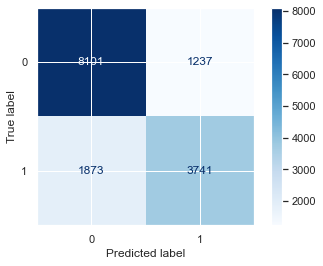

In [89]:
plot_confusion_matrix(best_model, X_test, y_test, cmap='Blues')

In [91]:
explainer = shap.Explainer(best_model.predict, X_test)
shap_values = explainer(X_test)

Permutation explainer: 14953it [16:14, 15.18it/s]                                                                      


In [92]:
feature_names = df.drop(columns='active').columns
shap_values.feature_names = feature_names

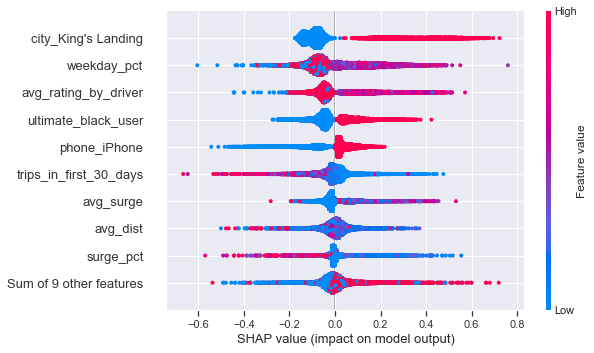

In [93]:
shap.plots.beeswarm(shap_values)

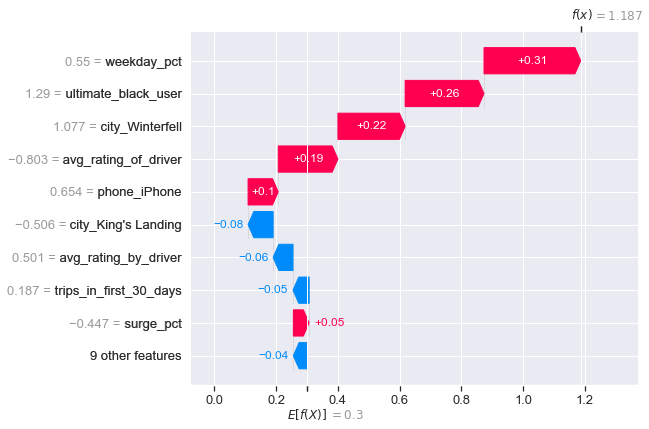

In [94]:
shap.plots.waterfall(shap_values[0])

## Recomandations

One main purpose of conducting these predictive analysis is to be used in determining future customer behaviours.
In other words, the main value of conducting this project is to see out of all our current customers, who will be retained and who will not.

Ultimate can use this to target the customers who are likely to become inactive with personalized promotions, advertising. Another usefull tool that can be implemented before implementing any process is A/B Testing.

Identify those with high percentage to become inactive, randomly divide them into Control and Variant, and see if your Promotions and Advertising pays off.

Another aspect of our Modeling is to understand which features are of high importance when explaining the prediction.

As we can see the following features are having major contributions in predicting if a customer will become inactive:
* customers in King's Landing are more likely to remain active
* so are those who are using Black_cars services
* Using an Iphone is also telling that customer migh be inclined to remain active
